# 1. Predictive model

Credit card usage prediction

**Objective**

Our goal is to develop a *regression model* that forecasts the *transaction amount* for each credit card in the *upcoming month*.







## 1.0 Download dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import requests
from io import BytesIO
from zipfile import ZipFile

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

from datetime import date

In [ ]:
!pip install category_encoders
from category_encoders import TargetEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
!kaggle datasets download -d iabhishekofficial/creditcard-fraud-detection

Dataset URL: https://www.kaggle.com/datasets/iabhishekofficial/creditcard-fraud-detection
License(s): other
  0% 0.00/7.17M [00:00<?, ?B/s]
100% 7.17M/7.17M [00:00<00:00, 89.8MB/s]


In [ ]:
# !unzip -o creditcard-fraud-detection.zip

In [ ]:
!unzip -o creditcard-fraud-detection.zip

Archive:  creditcard-fraud-detection.zip
  inflating: cc_info.csv             
  inflating: transactions.csv        


In [ ]:
df_info = pd.read_csv('cc_info.csv')
df_txn = pd.read_csv('transactions.csv')
df_txn['date'] = pd.to_datetime(df_txn['date'])

## 1.1 Data visualization​


### 1.1.1 Please display the first 10 rows of  ```df_info``` you read from above cell


In [ ]:
df_info.head(10)

credit_card         city state  zipcode  credit_card_limit
0  1280981422329509       Dallas    PA    18612               6000
1  9737219864179988      Houston    PA    15342              16000
2  4749889059323202       Auburn    MA     1501              14000
3  9591503562024072      Orlando    WV    26412              18000
4  2095640259001271     New York    NY    10001              20000
5  1997929794676601      Atlanta    NY    14808              21000
6  5449610971108305   Pittsburgh    PA    15201               6000
7  7482288151831611   Birmingham    NJ     8011               4000
8  8137811493121777   Washington    NH     3280              15000
9  7804216189681274  Los Angeles    CA    90001              20000

In [ ]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


In [ ]:
df_txn.head(10)

credit_card                date  transaction_dollar_amount       Long  \
0  1003715054175576 2015-09-11 00:32:40                      43.78 -80.174132   
1  1003715054175576 2015-10-24 22:23:08                     103.15 -80.194240   
2  1003715054175576 2015-10-26 18:19:36                      48.55 -80.211033   
3  1003715054175576 2015-10-22 19:41:10                     136.18 -80.174138   
4  1003715054175576 2015-10-26 20:08:22                      71.82 -80.238720   
5  1003715054175576 2015-10-17 21:28:57                     121.60 -80.243565   
6  1003715054175576 2015-08-29 18:34:04                     122.65 -80.238186   
7  1003715054175576 2015-08-14 21:34:39                      98.00 -80.244063   
8  1003715054175576 2015-09-17 19:20:37                      95.20  -2.833179   
9  1003715054175576 2015-09-11 18:59:04                      57.95 -80.287528   

         Lat  
0  40.267370  
1  40.180114  
2  40.313004  
3  40.290895  
4  40.166719  
5  40.260887  
6  40.245928  
7  40.249143  
8  34.745015  
9  40.267874

In [ ]:
df_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   date                       294588 non-null  datetime64[ns]
 2   transaction_dollar_amount  294588 non-null  float64       
 3   Long                       294588 non-null  float64       
 4   Lat                        294588 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 11.2 MB


In [ ]:
df_txn['date'] = pd.to_datetime(df_txn['date'])

### 1.1.2 Visualize the distribution of the ```credit_card_limit``` column from ```df_info```.



In [ ]:
#### YOUR CODE IS HERE ####

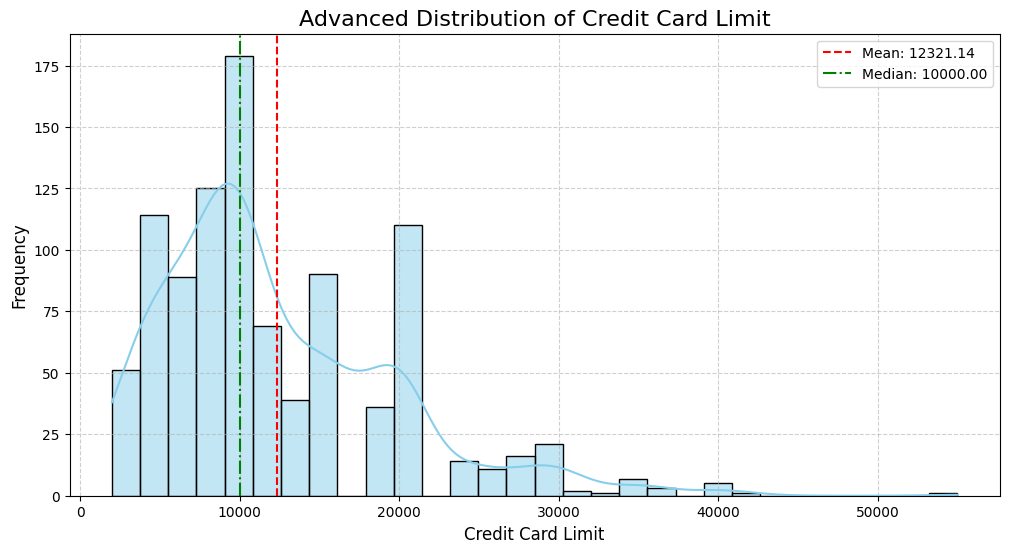

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(df_info['credit_card_limit'], kde=True, color='skyblue', bins=30, edgecolor='black')

mean_val = df_info['credit_card_limit'].mean()
median_val = df_info['credit_card_limit'].median()

plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')

plt.title('Advanced Distribution of Credit Card Limit', fontsize=16)
plt.xlabel('Credit Card Limit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.legend()

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

### 1.1.3 Visualize the relationship between ```state``` and average ```credit card limit``` as a bar chart from ```df_info```

In [ ]:
#### YOUR CODE IS HERE ####

<ipython-input-15-7bf11c4b1172>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='credit_card_limit', data=df_info, palette='viridis')


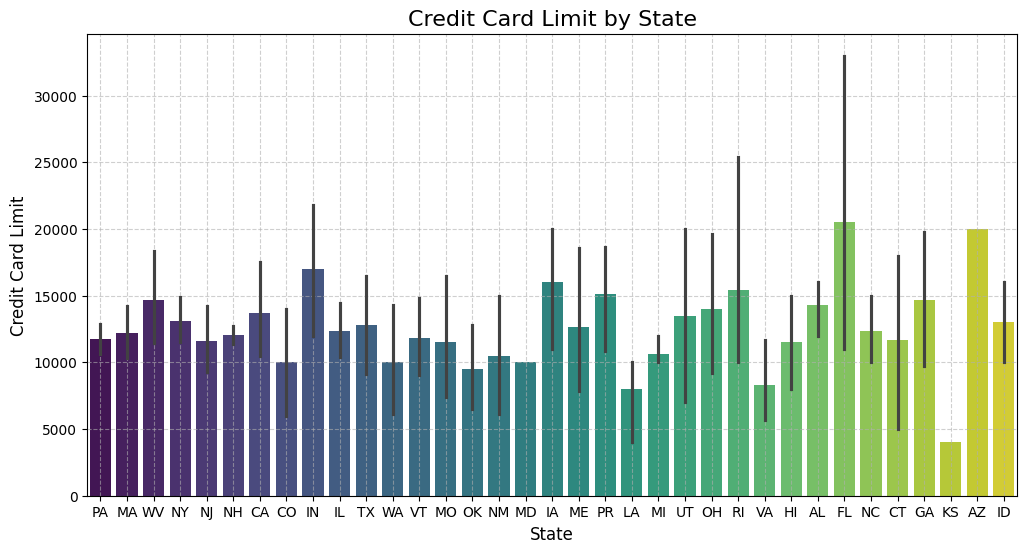

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='credit_card_limit', data=df_info, palette='viridis')
plt.title('Credit Card Limit by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Credit Card Limit', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<ipython-input-16-08a76bb024a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='state', y='credit_card_limit', data=df_info, palette='viridis')


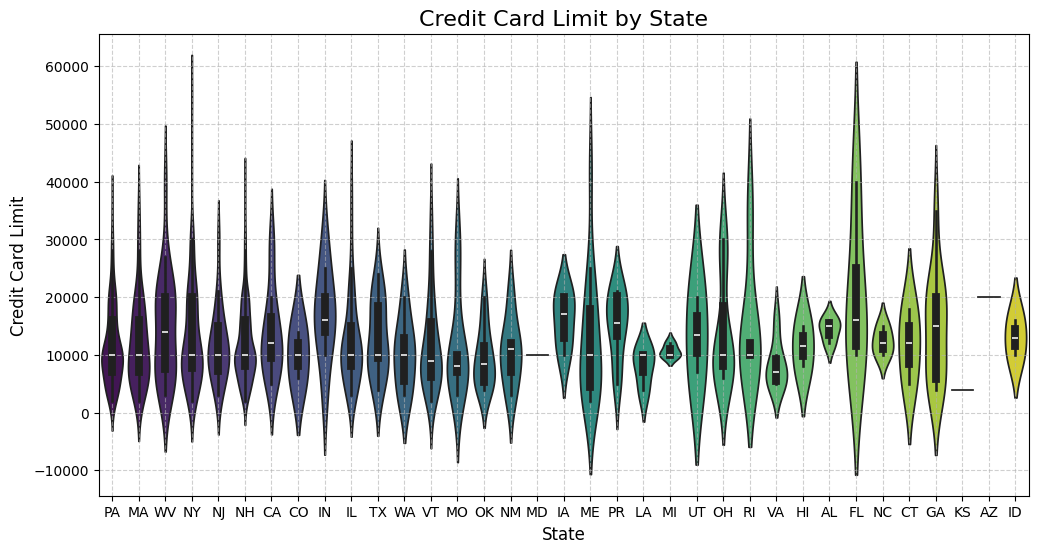

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='state', y='credit_card_limit', data=df_info, palette='viridis')
plt.title('Credit Card Limit by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Credit Card Limit', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 1.1.4 Which month and day has the highest transaction amount? and what is the total transaction amount for that day?

In [ ]:
#### YOUR CODE IS HERE ####

In [ ]:
df_txn['date'] = df_txn['date'].dt.strftime('%Y-%m-%d')

In [ ]:
df_txn['date'].unique()

array(['2015-09-11', '2015-10-24', '2015-10-26', '2015-10-22',
       '2015-10-17', '2015-08-29', '2015-08-14', '2015-09-17',
       '2015-08-07', '2015-08-24', '2015-10-01', '2015-09-25',
       '2015-09-18', '2015-09-27', '2015-10-05', '2015-09-04',
       '2015-09-09', '2015-10-29', '2015-09-19', '2015-10-27',
       '2015-08-27', '2015-10-02', '2015-10-21', '2015-10-23',
       '2015-08-10', '2015-08-03', '2015-09-24', '2015-08-02',
       '2015-10-07', '2015-10-18', '2015-07-31', '2015-08-17',
       '2015-09-30', '2015-10-08', '2015-10-12', '2015-08-26',
       '2015-08-13', '2015-09-28', '2015-09-01', '2015-09-21',
       '2015-08-04', '2015-08-06', '2015-10-03', '2015-10-13',
       '2015-09-29', '2015-08-09', '2015-08-19', '2015-10-10',
       '2015-08-01', '2015-08-08', '2015-09-23', '2015-09-03',
       '2015-08-15', '2015-08-22', '2015-09-16', '2015-10-15',
       '2015-08-21', '2015-08-12', '2015-10-16', '2015-08-30',
       '2015-09-08', '2015-09-05', '2015-10-28', '2015-

In [ ]:
df_txn_max_amt_day = df_txn.groupby('date')['transaction_dollar_amount'].sum().sort_values(ascending=False)

In [ ]:
df_txn_max_amt_day.head(5)

date
2015-09-11    467161.04
2015-08-07    455498.03
2015-08-21    450225.52
2015-10-09    448800.78
2015-08-28    444995.49
Name: transaction_dollar_amount, dtype: float64

In [ ]:
max_amt_date = df_txn_max_amt_day.index[0]
max_amt = df_txn_max_amt_day.iloc[0]

In [ ]:
answer_date = pd.to_datetime(max_amt_date)
answer_total_txn = max_amt

In [ ]:
print(f'target month is {answer_date.month} and target day is {answer_date.day}' )
print(f'total transaction equal {answer_total_txn}')

target month is 9 and target day is 11
total transaction equal 467161.04


## 1.2 Data preparation​

### We will build monthly features as a DataFrame with the following columns:

1.   `credit_card` [Primary key]
2.   `feat_dt` [Primary key]

**Example:**

|credit_card|feat_dt |sum_amt_l1w	|sum_amt_l2w	|sum_amt_l4w	|count_txn_l1w	|count_txn_l2w	|count_txn_l4w	|pct_usage	|avg_long	|avg_lat|
|----|----|----|----|----|----|----|----|----|----|----|
|1003715054175576| 2015-08-31| 2848.51| 4280.81| 5852.26| 23.0| 38.0| 58.0| 39.43| -80.220597| 40.240542|
|1013870087888817	|2015-08-31	|3062.95	|6577.99	|8448.33		|28.0	|55.0	|75.0	|74.525800|	 -72.093032	|43.163705
|1023820165155391	|2015-08-31	|5810.16	|12283.20	|15327.74	|50.0	|96.0	|138.0	|78.105179|	 -73.234400	|44.312872


### We build label as Total transaction along next week


In [ ]:
# JUST RUN
def gen_label(feat_dt, txn):
  txn['tmp_date'] = feat_dt
  txn['tmp_date'] = pd.to_datetime(txn['tmp_date'])
  txn['day_diff'] = (txn['date']-txn['tmp_date']).dt.days
  label = txn[txn['day_diff'].between(1, 7)].groupby('credit_card').agg(sum_amt_label=('transaction_dollar_amount', 'sum')).reset_index()
  label['sum_amt_label'] = label['sum_amt_label'].fillna(0)
  label['feat_dt'] = feat_dt
  return label

### 1.2.1 Build Monthly Features - Sum Amount

1. Sum of amount in the last 1 week (7 days)
2. Sum of amount in the last 2 weeks (14 days)
3. Sum of amount in the last 4 weeks (28 days)

For example, for a credit card with a feature date of `2022-07-28`, you would calculate the sum of transaction amounts from:

* `2022-07-22` to `2022-07-28` (7 days)
* `2022-07-15` to `2022-07-28` (14 days)
* `2022-07-01` to `2022-07-28` (28 days)

**Example:**

|credit_card      | feat_dt     | sum_amt_l1w | sum_amt_l2w | sum_amt_l4w|
|----|----|----|----|----|
| 1003715054175576 | 2015-10-31  | 20000       | 500000      | 1212123|





In [ ]:
# JUST RUN
def gen_feat_sum_amount(feat_dt, txn):
  txn['tmp_date'] = feat_dt
  txn['tmp_date'] = pd.to_datetime(txn['tmp_date'])
  txn['day_diff'] = (txn['tmp_date']-txn['date']).dt.days

  feat_1 = txn[txn['day_diff'].between(0, 7)].groupby('credit_card').agg(sum_amt_l1w=('transaction_dollar_amount', 'sum')).reset_index()
  feat_2 = txn[txn['day_diff'].between(0, 14)].groupby('credit_card').agg(sum_amt_l2w=('transaction_dollar_amount', 'sum')).reset_index()
  feat_3 = txn[txn['day_diff'].between(0, 28)].groupby('credit_card').agg(sum_amt_l4w=('transaction_dollar_amount', 'sum')).reset_index()

  feat_sum_amt = feat_1.merge(feat_2, on='credit_card', how='outer').merge(feat_3, on='credit_card', how='outer')
  feat_sum_amt['feat_dt'] = feat_dt
  feat_sum_amt = feat_sum_amt.fillna(0)
  return feat_sum_amt

### 1.2.2 Build Monthly Features - Count Transactions

4. Count of transactions in the last 1 week (7 days)
5. Count of transactions in the last 2 weeks (14 days)
6. Count of transactions in the last 4 weeks (28 days)

For example, for a credit card with a feature date of `2022-07-28`, you would count the number of transactions from:

* `2022-07-22` to `2022-07-28` (7 days)
* `2022-07-15` to `2022-07-28` (14 days)
* `2022-07-01` to `2022-07-28` (28 days)

**Example:**

|credit_card      | feat_dt     | count_txn_l1w | count_txn_l2w | count_txn_l4w|
|----|----|----|----|----|
| 1003715054175576 | 2015-10-31  | 5            | 10            | 50




In [ ]:
#### YOUR CODE IS HERE ####

In [ ]:
def gen_feat_count_txn(feat_dt, txn):
  txn['tmp_date'] = feat_dt
  txn['tmp_date'] = pd.to_datetime(txn['tmp_date'])
  txn['day_diff'] = (txn['tmp_date']-txn['date']).dt.days

  feat_1 = txn[txn['day_diff'].between(0, 7)].groupby('credit_card').agg(count_txn_l1w=('transaction_dollar_amount', 'count')).reset_index()
  feat_2 = txn[txn['day_diff'].between(0, 14)].groupby('credit_card').agg(count_txn_l2w=('transaction_dollar_amount', 'count')).reset_index()
  feat_3 = txn[txn['day_diff'].between(0, 28)].groupby('credit_card').agg(count_txn_l4w=('transaction_dollar_amount', 'count')).reset_index()

  feat_count_txn = feat_1.merge(feat_2, on='credit_card', how='outer').merge(feat_3, on='credit_card', how='outer')
  feat_count_txn['feat_dt'] = feat_dt
  feat_count_txn = feat_count_txn.fillna(0)
  return feat_count_txn

### 1.2.3 Build Monthly Features - Percent Usage

7. `percent_usage` is calculated as follows:
$$\textrm{percent_usage} = \displaystyle{\frac{\textrm{sum_amount_last_4_weeks} \times 100}{\textrm{credit_limit}}}$$

**Example:**

|credit_card      | feat_dt     | pct_usage |
|----|----|----|
| 1003715054175576 | 2015-10-31  | 20.12  |




In [ ]:
#### YOUR CODE IS HERE ####

In [ ]:
## build monthly features - percent usage
## percent usage = monthly_sum_amount * 100 / credit_limit

def gen_feat_usage(feat_dt, txn, card_info):
  txn['tmp_date'] = feat_dt
  txn['tmp_date'] = pd.to_datetime(txn['tmp_date'])
  txn['day_diff'] = (txn['tmp_date']-txn['date']).dt.days

  feat_1 = txn[txn['day_diff'].between(0, 28)].groupby('credit_card').agg(sum_amt_l1m=('transaction_dollar_amount', 'sum')).reset_index()
  feat_sum_amt = feat_1.fillna(0)
  feat_sum_amt['feat_dt'] = feat_dt

  feat_pct_usage = feat_sum_amt.merge(card_info[['credit_card', 'credit_card_limit']], on='credit_card')
  feat_pct_usage['pct_usage'] = feat_pct_usage['sum_amt_l1m'] * 100 / feat_pct_usage['credit_card_limit']
  feat_pct_usage = feat_pct_usage.drop(columns=['credit_card_limit'])

  return feat_pct_usage

### 1.2.4 Build Monthly Features - Find Average Long, Average Lat of Each Card in Each Month

8. `average(p10, p90) avg long`
9. `average(p10, p90) avg lat`

*Hint: You should remove outliers (lat, long). Why?*

For example, if you purchase 1 item in the USA and 10 items in Thailand, the average location without removing outliers might incorrectly indicate Japan (which could be irrelevant).

**Example:**

|credit_card      | feat_dt     | avg_long  | avg_lat  |
|----|----|----|----|
| 1003715054175576 | 2015-10-31  |  -80       | 40       |

In [ ]:
def remove_and_mean(data):
  if len(data)>=3:
    p10 = np.percentile(data, q=10)
    p90 = np.percentile(data, q=90)
    data_remove_outlier = [e for e in data if p10<=e<=p90]
  else:
    data_remove_outlier = data
  return np.mean(data_remove_outlier)

In [ ]:
def gen_feat_average_latlong(feat_dt, txn):
  txn['tmp_date'] = feat_dt
  txn['tmp_date'] = pd.to_datetime(txn['tmp_date'])
  txn['day_diff'] = (txn['tmp_date']-txn['date']).dt.days

  feat_avg_latlong = txn[txn['day_diff'].between(0, 999999)].groupby('credit_card').agg(
      avg_long=('Long', lambda x: remove_and_mean(x)),
      avg_lat=('Lat', lambda x: remove_and_mean(x))
  ).reset_index()
  feat_avg_latlong = feat_avg_latlong.fillna(0)
  feat_avg_latlong['feat_dt'] = feat_dt

  return feat_avg_latlong

In [ ]:
def gen_feat_location(info):
  info_sorted = info.sort_values(by='zipcode', ascending=True)
  info_sorted_unique = info_sorted.drop_duplicates(keep='first')
  info_sorted_unique = info_sorted_unique[['credit_card','city','state']]

  return info_sorted_unique

### 1.2.5 Build monthly features - combine all features and label.

In [ ]:
# JUST RUN
def gen_feat_label(feat_dt, info, txn):

  txn['date'] = pd.to_datetime(txn['date'])

  f1 = gen_feat_sum_amount(feat_dt, txn)
  f2 = gen_feat_count_txn(feat_dt, txn)
  f3 = gen_feat_usage(feat_dt, txn, info)
  f4 = gen_feat_average_latlong(feat_dt, txn)
  f5 = gen_feat_location(info)

  all_feat = f1.merge(
      f2, on=['credit_card', 'feat_dt'], how='outer'
  ).merge(
      f3, on=['credit_card', 'feat_dt'], how='outer'
  ).merge(
      f4, on=['credit_card', 'feat_dt'], how='outer'
  ) .merge(
      f5, on=['credit_card'], how='outer'
  )

  label = gen_label(feat_dt, txn)
  all_feat = all_feat.merge(label, on=['credit_card', 'feat_dt'], how='outer')

  return all_feat[[
      'credit_card', 'feat_dt',
      'sum_amt_l1w', 'sum_amt_l2w', 'sum_amt_l4w',
      'count_txn_l1w', 'count_txn_l2w', 'count_txn_l4w',
      'pct_usage',
      'avg_long', 'avg_lat','sum_amt_label',
      'city','state']]

In [ ]:
x1 = gen_feat_label(feat_dt=date(2015, 8, 31), info=df_info, txn=df_txn)
x2 = gen_feat_label(feat_dt=date(2015, 9, 7), info=df_info, txn=df_txn)
x3 = gen_feat_label(feat_dt=date(2015, 9, 14), info=df_info, txn=df_txn)
x4 = gen_feat_label(feat_dt=date(2015, 9, 21), info=df_info, txn=df_txn)
x5 = gen_feat_label(feat_dt=date(2015, 9, 28), info=df_info, txn=df_txn)
x6 = gen_feat_label(feat_dt=date(2015, 10, 7), info=df_info, txn=df_txn)
x7 = gen_feat_label(feat_dt=date(2015, 10, 14), info=df_info, txn=df_txn)
x8 = gen_feat_label(feat_dt=date(2015, 10, 21), info=df_info, txn=df_txn)
x9 = gen_feat_label(feat_dt=date(2015, 10, 28), info=df_info, txn=df_txn)

In [ ]:
df_final = pd.concat([x1, x2, x3, x4, x5, x6, x7, x8, x9])

In [ ]:
df_final['sum_amt_label'] = df_final['sum_amt_label'].fillna(0)
df_final = df_final.reset_index(drop=True)

In [ ]:
df_final.head()

credit_card     feat_dt  sum_amt_l1w  sum_amt_l2w  sum_amt_l4w  \
0  1003715054175576  2015-08-31      2571.93      4384.09      7850.76   
1  1013870087888817  2015-08-31      2964.49      6713.37     11232.45   
2  1023820165155391  2015-08-31      5606.69     11414.00     21012.27   
3  1073931538936472  2015-08-31       425.82      1014.47      2714.77   
4  1087468642191606  2015-08-31      1300.58      1554.07      2735.77   

   count_txn_l1w  count_txn_l2w  count_txn_l4w  pct_usage    avg_long  \
0           20.0           39.0           80.0  39.253800  -80.217937   
1           27.0           55.0          106.0  74.883000  -72.091739   
2           46.0           93.0          184.0  75.043821  -73.234753   
3            4.0            8.0           20.0  27.147700  -75.944111   
4            7.0           11.0           25.0  91.192333 -121.806871   

     avg_lat  sum_amt_label        city state  
0  40.242959        3116.94     Houston    PA  
1  43.165977        4113.85  Washington    NH  
2  44.309500        4917.81   Charlotte    VT  
3  41.338020         355.85      Dallas    PA  
4  47.442614         438.27     Seattle    WA

In [ ]:
df_final.isnull().sum()

credit_card       0
feat_dt          30
sum_amt_l1w      53
sum_amt_l2w      53
sum_amt_l4w      53
count_txn_l1w    53
count_txn_l2w    53
count_txn_l4w    53
pct_usage        53
avg_long         37
avg_lat          37
sum_amt_label     0
city              7
state             7
dtype: int64

## 1.3 Model pipeline and evaluation metrics

### 1.3.1 Create `df_train`, `df_val`, and `df_test` Following the Criteria

1. `df_train`:\
   `feat_dt` between `2015-08-31` and `2015-09-28` (inclusive)
2. `df_val`:\
   `feat_dt` are `2015-10-07` and `2015-10-14`
3. `df_test`:\
   `feat_dt` are `2021-10-21` and `2015-10-28`







In [ ]:
  #### YOUR CODE IS HERE ####

In [ ]:
def prep_train_val_test(df_final):
    # Ensure 'feat_dt' is in datetime format
    df_final['feat_dt'] = pd.to_datetime(df_final['feat_dt'])

    # Convert date objects to datetime
    start_train = pd.to_datetime(date(2015, 8, 31))
    end_train = pd.to_datetime(date(2015, 9, 28))

    start_val = pd.to_datetime(date(2015, 10, 7))
    end_val = pd.to_datetime(date(2015, 10, 14))

    start_test = pd.to_datetime(date(2015, 10, 21))
    end_test = pd.to_datetime(date(2015, 10, 28))

    # Split into train, validation, and test sets using datetime ranges
    df_train = df_final[df_final['feat_dt'].between(start_train, end_train)]
    df_val = df_final[df_final['feat_dt'].between(start_val, end_val)]
    df_test = df_final[df_final['feat_dt'].between(start_test, end_test)]

    return df_train, df_val, df_test

In [ ]:
df_train, df_val, df_test = prep_train_val_test(df_final)

### 1.3.2 Prepare `X` and `y` from Training, Validation, and Test Sets Following the Criteria

1. `X` comes from the columns:

       'sum_amt_l1w', 'sum_amt_l2w', 'sum_amt_l4w',
       'count_txn_l1w', 'count_txn_l2w', 'count_txn_l4w',
       'pct_usage', 'avg_long', 'avg_lat'

  After selecting the above columns, fill null values with 0 for all features.

2. `y` comes from the column `sum_amt_label`.

In [ ]:
#### YOUR CODE IS HERE ####

In [ ]:
def prep_X_y(df):
    # Selecting feature columns for X
    X = df[['sum_amt_l1w', 'sum_amt_l2w', 'sum_amt_l4w',
            'count_txn_l1w', 'count_txn_l2w', 'count_txn_l4w',
            'pct_usage', 'avg_long', 'avg_lat']]

    # Selecting the label column for y
    y = df[['sum_amt_label']]

    # Fill missing values with 0 for both X and y
    X = X.fillna(0).astype(float)  # Ensure X contains numeric values
    y = y.fillna(0).astype(float)  # Ensure y contains numeric values

    return X, y

In [ ]:
X_train,y_train = prep_X_y(df_train)
X_val,y_val = prep_X_y(df_val)
X_test,y_test = prep_X_y(df_test)

### 1.3.3 Create Lasso Regression Model Using

1. **Lasso Regression**
   - Library: `sklearn.linear_model`

2. **Inputs**
   - `X` is the feature set
   - `y` is the label set
   - `alpha` is a hyperparameter in the Lasso model

3. **Output**
   - `lasso` model

In [ ]:
#### YOUR CODE IS HERE ####

In [ ]:
def create_lasso_model(X, y, alpha):
  lasso = Lasso(alpha=alpha, random_state=42)
  lasso.fit(X, y)

  return lasso

In [ ]:
# JUST RUN

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

lasso = create_lasso_model(X_train_scaled, y_train,alpha=0.1)
y_test_pred = lasso.predict(X_test_scaled)

# Performance of this model
mse_lasso_first = mean_squared_error(y_test, y_test_pred)
mae_lasso_first = mean_absolute_error(y_test, y_test_pred)
print("\nRidge Regression Model Performance:")
print(f"Mean Squared Error: {mse_lasso_first}")
print(f"Mean Absolute Error: {mae_lasso_first}")


Ridge Regression Model Performance:
Mean Squared Error: 2414965.973711987
Mean Absolute Error: 1089.58937305532


In [ ]:
def plot_feature_importance(model, X):
    # Get feature importance from the model
    importance = model.coef_
    # Create a DataFrame to store the feature importance
    feature_importance = pd.DataFrame(importance, index=X.columns, columns=['importance'])
    # Sort the values in descending order
    feature_importance = feature_importance.sort_values(by='importance', ascending=False)
    # Plot the feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_importance['importance'], y=feature_importance.index, palette='viridis')
    plt.title('Feature Importance', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

<ipython-input-50-b1b23f26069e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['importance'], y=feature_importance.index, palette='viridis')


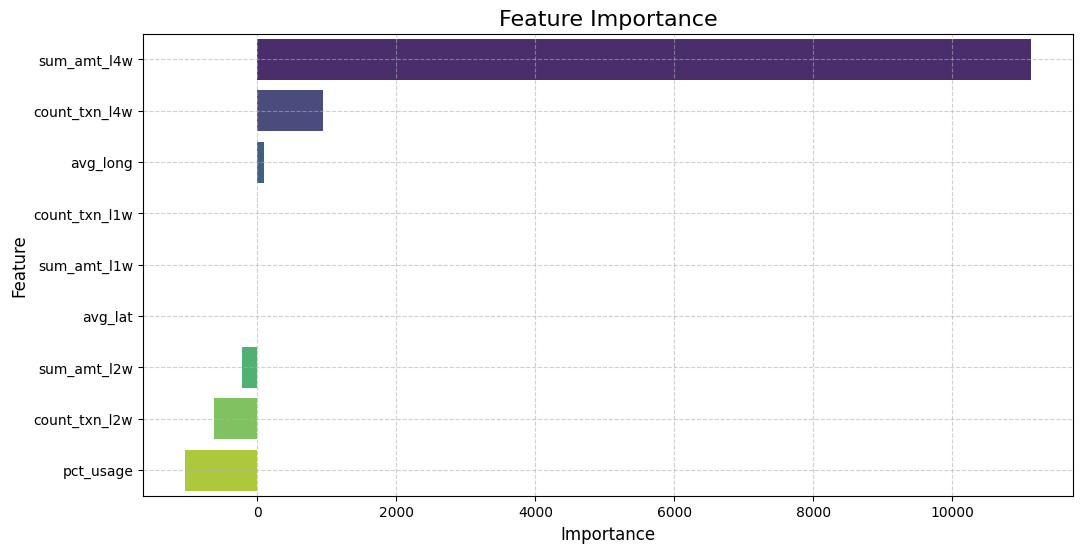

In [ ]:
plot_feature_importance(lasso, X_train)

### 1.3.4 Show Scatter Plot Between `y_test` and `y_test_pred`

1. The x-axis represents `y_test`.
2. The y-axis represents `y_test_pred`.

In [ ]:
#### YOUR CODE IS HERE ####

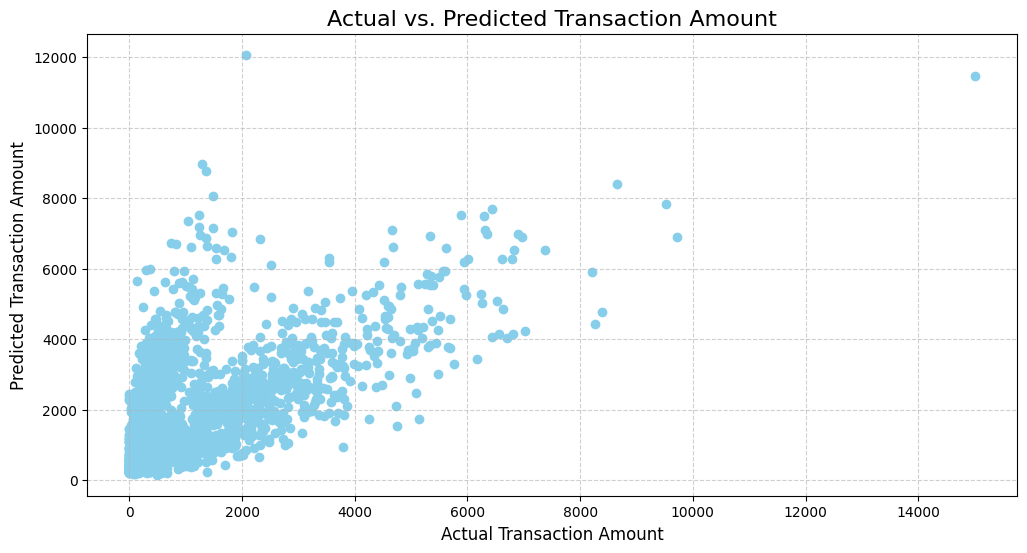

In [ ]:
#show scatter plot of the y_test and y_test_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, color='skyblue')
plt.title('Actual vs. Predicted Transaction Amount', fontsize=16)
plt.xlabel('Actual Transaction Amount', fontsize=12)
plt.ylabel('Predicted Transaction Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

#plot the line of best fit

#plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], linestyle='--', color='red')
plt.show()

### Lasso regression with hyperparameter tuning

In [ ]:
# JUST RUN

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define a range of alpha values to try
alpha_values = [0.01,0.1,0.6,0.8,1,1.2,1.4,1.6,2,4,5,10,100]

# Initialize variables to store the best alpha and its corresponding performance
best_alpha = None
best_mse = np.inf  # Start with a large value for MSE

# Loop through the different alpha values
for alpha in alpha_values:
    # Create and train the Ridge Regression model
    model = create_lasso_model(X_train_scaled, y_train, alpha)

    # Predict on the validation set
    y_val_pred = model.predict(X_val_scaled)

    # Calculate the Mean Squared Error on the validation set
    mse_val = mean_squared_error(y_val, y_val_pred)
    print(f"Alpha: {alpha}, Validation MSE: {mse_val:.4f}")

    # Check if this is the best performance so far
    if mse_val < best_mse:
        best_mse = mse_val
        best_alpha = alpha

Alpha: 0.01, Validation MSE: 647574.5979
Alpha: 0.1, Validation MSE: 646866.0875
Alpha: 0.6, Validation MSE: 644663.5074
Alpha: 0.8, Validation MSE: 644330.5288
Alpha: 1, Validation MSE: 644241.9652
Alpha: 1.2, Validation MSE: 644169.2200
Alpha: 1.4, Validation MSE: 644112.0285
Alpha: 1.6, Validation MSE: 644070.2390
Alpha: 2, Validation MSE: 644035.3710
Alpha: 4, Validation MSE: 644810.9890
Alpha: 5, Validation MSE: 645792.1300
Alpha: 10, Validation MSE: 656632.9535
Alpha: 100, Validation MSE: 1220022.4523


In [ ]:
# Print the best alpha and its corresponding MSE
print(f"\nBest alpha: {best_alpha}")
print(f"Best Validation MSE: {best_mse:.4f}")

# Train the final model using the best alpha value
final_model = create_lasso_model(X_train_scaled, y_train, best_alpha)


Best alpha: 2
Best Validation MSE: 644035.3710


### 1.3.5 After Tuning the Model Using Hyperparameter Tuning, What Are the Mean Squared Error and Mean Absolute Error of This Model?

*Hint: Calculate metrics based on `X_test_scaled` and `y_test`.*

In [ ]:
#### YOUR CODE IS HERE ####

In [ ]:
def get_mean_squared_error(model, X, y):
  y_pred = model.predict(X)
  mse = mean_squared_error(y, y_pred)
  return mse

In [ ]:
def get_mean_absolute_error(model, X, y):
  y_pred = model.predict(X)
  mae = mean_absolute_error(y, y_pred)
  return mae

### 1.3.6 Which model is better? first model or final_model

In [ ]:
#### YOUR CODE IS HERE (OPTIONAL) ####

In [ ]:
# result of first model

In [ ]:
mse_lasso_first = get_mean_squared_error(lasso, X_test_scaled, y_test)
mae_lasso_first = get_mean_absolute_error(lasso, X_test_scaled, y_test)

In [ ]:
print("\nRidge Regression Model Performance:")
print(f"Mean Squared Error: {mse_lasso_first}")
print(f"Mean Absolute Error: {mae_lasso_first}")


Ridge Regression Model Performance:
Mean Squared Error: 2414965.973711987
Mean Absolute Error: 1089.58937305532


In [ ]:
# result of final model

In [ ]:
mse_lasso_final = get_mean_squared_error(final_model, X_test_scaled, y_test)
mae_lasso_final = get_mean_absolute_error(final_model, X_test_scaled, y_test)

In [ ]:
print("\nRidge Regression Model Performance:")
print(f"Mean Squared Error: {mse_lasso_final}")
print(f"Mean Absolute Error: {mae_lasso_final}")


Ridge Regression Model Performance:
Mean Squared Error: 2399745.0236105327
Mean Absolute Error: 1089.3002281770998


In [ ]:
## YOUR ANSWER HERE ##

In [ ]:
answer = 'final model'
print(f'{answer} is better')

final model is better


---


# 2. Time Series Analysis



In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

## 2.0 Download dataset

In this lab, we will use the monthly Electricity Production data from Kaggle.

https://www.kaggle.com/datasets/shenba/time-series-datasets/data?select=Electric_Production.csv

In [ ]:
!kaggle datasets download -d shenba/time-series-datasets
!unzip -o time-series-datasets.zip -d time_series_dataset
!rm time-series-datasets.zip

Dataset URL: https://www.kaggle.com/datasets/shenba/time-series-datasets
License(s): unknown
  0% 0.00/19.2k [00:00<?, ?B/s]
100% 19.2k/19.2k [00:00<00:00, 37.6MB/s]
Archive:  time-series-datasets.zip
  inflating: time_series_dataset/Electric_Production.csv  
  inflating: time_series_dataset/daily-minimum-temperatures-in-me.csv  
  inflating: time_series_dataset/monthly-beer-production-in-austr.csv  
  inflating: time_series_dataset/sales-of-shampoo-over-a-three-ye.csv  


In [ ]:
df = pd.read_csv('time_series_dataset/Electric_Production.csv')
df = df.rename({
    'DATE': 'Date',
    'IPG2211A2N': 'Production'
}, axis=1)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.set_index('Date')

data = df['Production']

After reading the time series data from the CSV file, we did some formatting so that our `data` is a Pandas Series with Date as its index, as shown below.

In [ ]:
data.head()

Date
1985-01-01    72.5052
1985-02-01    70.6720
1985-03-01    62.4502
1985-04-01    57.4714
1985-05-01    55.3151
Name: Production, dtype: float64

## 2.1 Hands-On with `auto_arima` for ARIMA Parameter Selection

In the lecture, we introduced a tool for identifying the appropriate parameters for ARIMA models: `auto_arima` from the pmdarima library.

For detailed documentation, you can refer to the pmdarima `auto_arima` [documentation](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html).

In this lab, you will gain hands-on experience using `auto_arima` to simplify the process of selecting ARIMA parameters. We will also explore the importance of the seasonal component in SARIMA models.

In [ ]:
import pmdarima as pm

### 2.1.1 Train-Test Data Splitting

First, we need to slice our `data` to select a portion of the dataset and split it into training and test sets. Your task is to apply slicing to `data` so that `train_data` includes data from **January 2001 to December 2014**, while `test_data` includes data from **January 2015 to December 2017**.

In [ ]:
### YOUR CODE HERE ###

In [ ]:
train_data = data['2001-01-01':'2014-12-01']
test_data = data['2015-01-01':'2017-12-01']

In [ ]:
train_data.head()

Date
2001-01-01    109.1081
2001-02-01     97.1717
2001-03-01     92.8283
2001-04-01     82.9150
2001-05-01     82.5465
Name: Production, dtype: float64

In [ ]:
test_data.head()

Date
2015-01-01    120.2696
2015-02-01    116.3788
2015-03-01    104.4706
2015-04-01     89.7461
2015-05-01     91.0930
Name: Production, dtype: float64

### 2.1.2 Plotting Training and Test Data

Your task is to implement the `plot_train_test` function that meets the following requirements:

* The function should plot `train_data` and `test_data` on the same figure.
* `train_data` and `test_data` should be plotted in different colors, with a legend indicating which color represents each dataset.
* The x-axis should display the corresponding dates and be labeled "Date".
* The y-axis should be labeled "Electricity Production".

**Hint:** Since our data is a Pandas Series, you can use the `pandas.Series.plot` function to make plotting more convenient. Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) for additional details.

**Note:** Do not include `plt.show()` in the function. It will be called separately after the function is executed.


In [ ]:
### YOUR CODE HERE ###

In [ ]:
def plot_train_test(train_data, test_data):
  plt.figure(figsize=(12, 6))
  train_data.plot(label='Train Data', color='blue')
  test_data.plot(label='Test Data', color='orange')
  plt.xlabel("Date")
  plt.ylabel("Electricity Production")
  plt.legend()

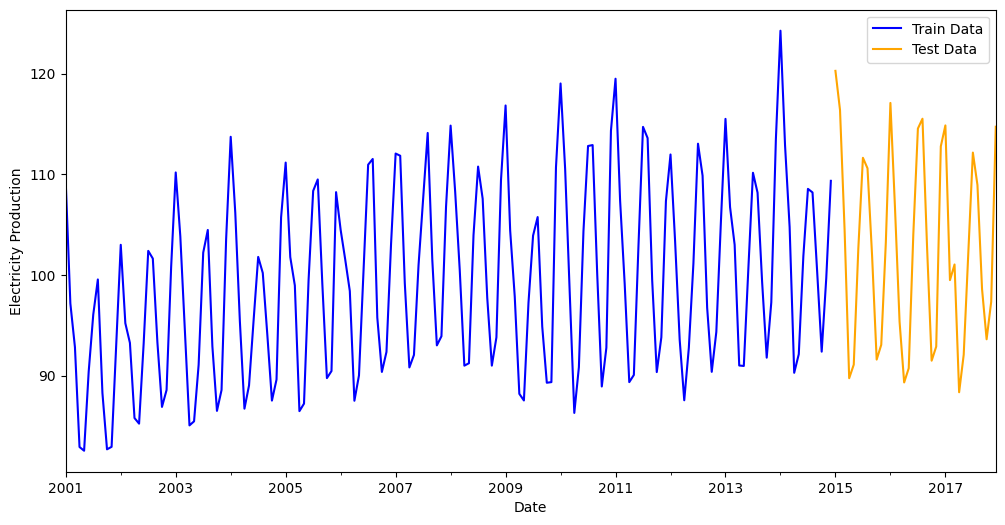

In [ ]:
plot_train_test(train_data, test_data)
plt.show()

### 2.1.3 Adding Predictions to the Plot

We will prepare another plotting function to be used after we complete the forecasting task in 2.1.4. Your task is to implement the `plot_train_test_pred` function, which is similar to the function you implemented in task 2.1.2. Follow the steps below:

1. Copy the code from your `plot_train_test` function into the `plot_train_test_pred` function.
2. Plot `prediction` on the same figure. Ensure that `prediction` is plotted in a different color and include it in the legend.

**Note:** Do not include `plt.show()` in the function. It will be called separately after the function is executed.


In [ ]:
### YOUR CODE HERE ###

In [ ]:
def plot_train_test_pred(train_data, test_data, prediction):
  plt.figure(figsize=(12, 6))
  train_data.plot(label='Train Data', color='blue')
  test_data.plot(label='Test Data', color='orange')
  prediction.plot(label='Prediction', color='green')
  plt.xlabel("Date")
  plt.ylabel("Electricity Production")
  plt.legend()

### 2.1.4 Fitting Non-Seasonal ARIMA Model and Forecasting

Next, we will use the `auto_arima` function to fit non-seasonal ARIMA models and find the best parameters for our training data. Your task is to complete the following steps:

1. Use the `auto_arima` function to fit ARIMA models and find the best parameters for our `train_data`. Store the result in `arima`.
   * For now, you do not need to consider seasonality. Configure the function to only consider non-seasonal ARIMA models.
   * Set the `trace` parameter to `True` to visualize the process of the best parameters search done by `auto_arima`.
   * If you consult the documentation for `auto_arima`, you might encounter many other parameters not discussed in the lecture. **You do not need to consider these advanced parameters**—only use the parameters mentioned in the lecture slides.

2. Use the `arima` model from the previous step to forecast the test data (i.e., out-of-sample prediction). Ensure that the prediction length matches the length of the test data. Store the forecasted values in `prediction`.

**Hint:** Revisit the lecture slides or the [documentation](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html) for guidance on how to use the function.

**Note:** The `auto_arima` function supports inputting a Pandas series, so you can directly use our data with the function. If done correctly, your `prediction` will also be a Pandas series with the correct date index.

Also, verify that `plot_train_test_pred` is functioning as expected. If not, revisit and modify your code from task 2.1.3.

In [ ]:
### YOUR CODE HERE ###

In [ ]:
arima = pm.auto_arima(train_data, seasonal=False, trace=True)
prediction = arima.predict(n_periods=len(test_data))
prediction = pd.Series(prediction, index=test_data.index)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=926.581, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1203.309, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1179.574, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1148.327, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1201.309, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=971.944, Time=1.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=920.014, Time=7.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=959.771, Time=1.11 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=919.170, Time=2.27 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=955.200, Time=2.14 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=922.187, Time=7.10 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=923.952, Time=5.40 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=930.360, Time=6.11 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=956.6

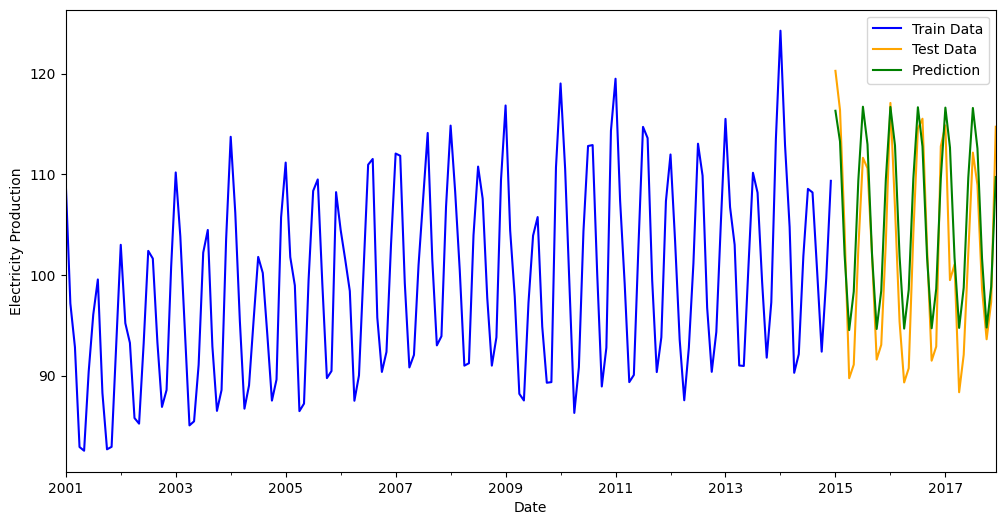

In [ ]:
plot_train_test_pred(train_data, test_data, prediction)
plt.show()

### 2.1.5 Finding the Seasonal Period

In contrast to task 2.1.4, where we did not consider seasonality, you might observe that the data contains some seasonal patterns. In this task, you will find the seasonal period of the seasonal pattern in our data. Follow the steps below:

1. Plot `train_data`, but this time only from **January 2012 to December 2014**. This will help you clearly observe how long it takes for the seasonal pattern to repeat.

   **Hint:** Observe the regular intervals at which similar patterns (such as peaks) repeat. This interval will indicate the length of the seasonal period.


2. Set `seasonal_period` as the seasonal period of the observed seasonal pattern.

   **Hint:** Determine how many time steps correspond to the interval you observed in step 1 to find the seasonal period. Recall that our data is **monthly** data.


In [ ]:
### YOUR CODE HERE ###

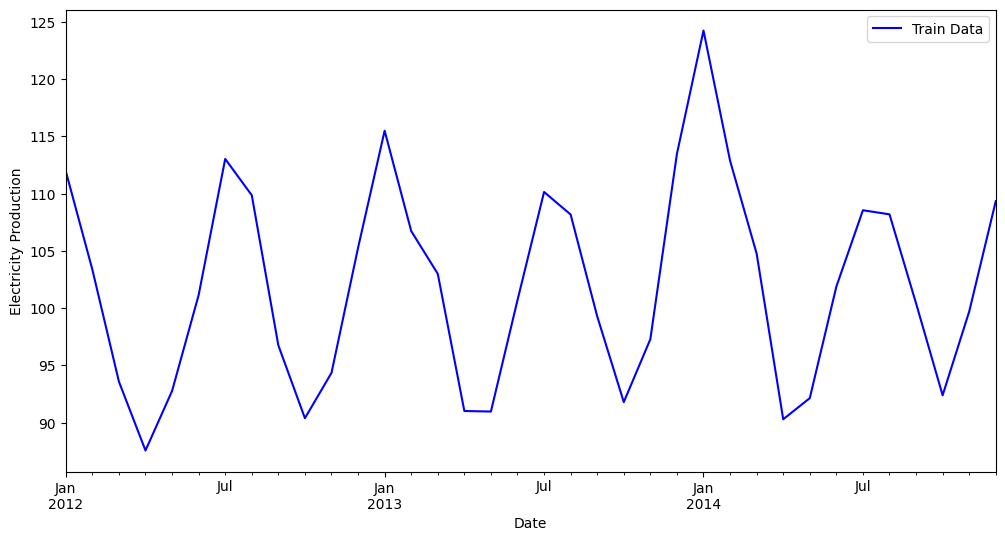

In [ ]:
plt.figure(figsize=(12, 6))
train_data['2012-01-01':'2014-12-01'].plot(label='Train Data', color='blue')
plt.xlabel("Date")
plt.ylabel("Electricity Production")
plt.legend()

plt.show()

In [ ]:
seasonal_period = 12

### 2.1.6 Fitting Seasonal ARIMA Model and Forecasting

In this task, you will repeat the process from task 2.1.4, but now incorporating seasonality identified in task 2.1.5. Follow these steps:

1. Use the `auto_arima` function to fit a seasonal ARIMA model to the training data, including the seasonal pattern you determined. Store the result in `arima_seasonal`.
   * Configure the function to account for seasonality using the seasonal period from task 2.1.5.
   * Set the `trace` parameter to `True` to visualize the process of finding the best parameters.
   * The parameters covered in the lecture slides are sufficient to complete this task.

2. Use the `arima_seasonal` model from the previous step to forecast the test data (i.e., out-of-sample prediction). Ensure that the prediction length matches the length of the test data. Store the forecasted values in `prediction_seasonal`.


In [ ]:
### YOUR CODE HERE ###

In [ ]:
arima_seasonal = pm.auto_arima(train_data, seasonal=True, m=seasonal_period, trace=True)
prediction_seasonal = arima_seasonal.predict(n_periods=len(test_data))
prediction_seasonal = pd.Series(prediction_seasonal, index=test_data.index)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.94 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=851.728, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=791.596, Time=0.33 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=776.694, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=859.762, Time=0.06 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=807.110, Time=0.18 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=5.71 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=795.288, Time=0.32 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=3.29 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=823.543, Time=0.30 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=766.910, Time=0.57 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=806.594, Time=0.22 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=

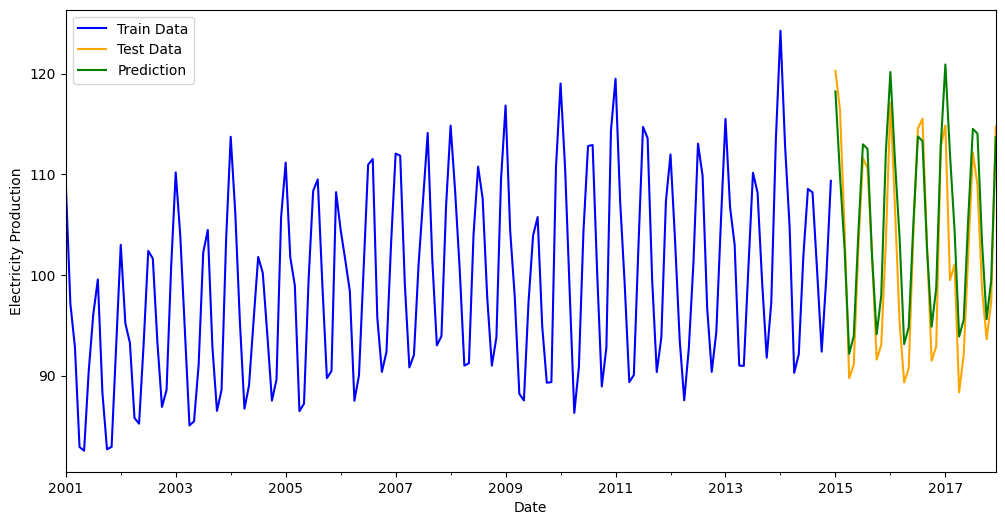

In [ ]:
plot_train_test_pred(train_data, test_data, prediction_seasonal)

<ipython-input-92-95d2716f4b1b>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


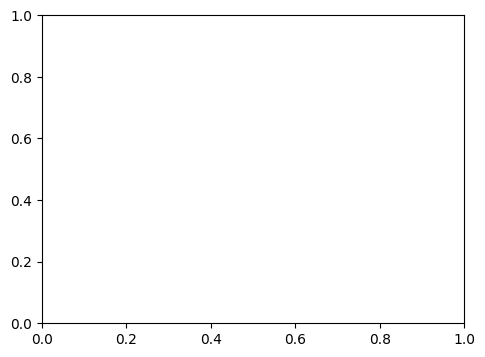

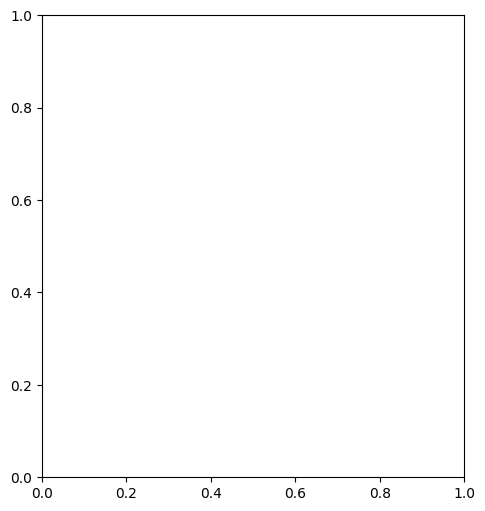

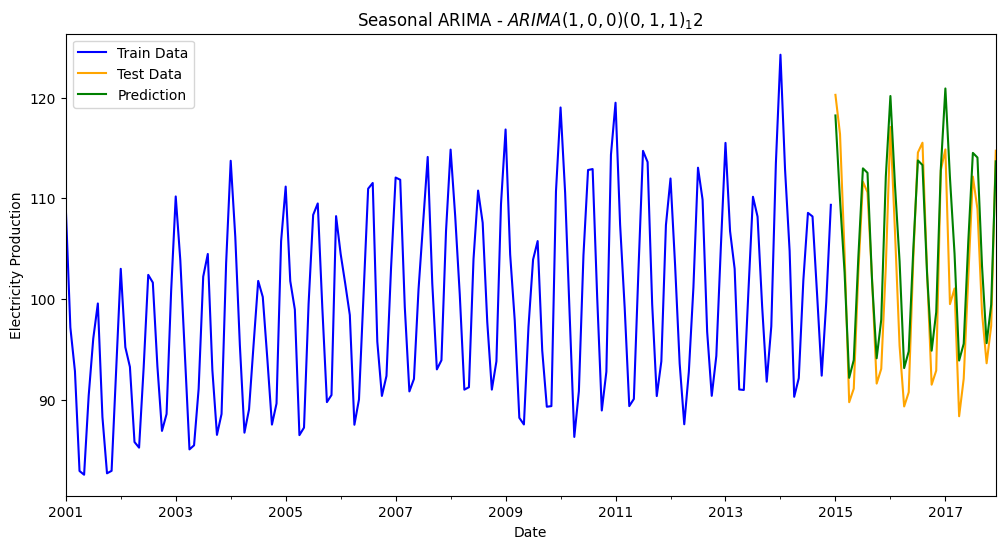

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plot_train_test_pred(train_data, test_data, prediction)

arima_params = arima.get_params()
plt.title("Non-Seasonal ARIMA - $ARIMA{pdq}{PDQ}_{m}$".format(
    pdq=arima_params['order'],
    PDQ=arima_params['seasonal_order'][:3],
    m=arima_params['seasonal_order'][3]
))

plt.subplot(1, 2, 2)
plot_train_test_pred(train_data, test_data, prediction_seasonal)

arima_seasonal_params = arima_seasonal.get_params()
plt.title("Seasonal ARIMA - $ARIMA{pdq}{PDQ}_{m}$".format(
    pdq=arima_seasonal_params['order'],
    PDQ=arima_seasonal_params['seasonal_order'][:3],
    m=arima_seasonal_params['seasonal_order'][3]
))

plt.show()

:From the comparison above, we observe that the non-seasonal ARIMA model can indeed capture some aspects of seasonality, but it requires a higher number of lags compared to the seasonal ARIMA model.

**Note:** A "lag" refers to the time steps in the past that the model uses to predict future values. In this case, if the previous tasks are done correctly, you will be able to see that the non-seasonal ARIMA model uses a higher number of autoregressive terms (the parameter $p$ of ARIMA) compared to the seasonal ARIMA model.

However, the seasonal ARIMA model more effectively captures the seasonal patterns, resulting in predictions that are closer to the actual test data. This underlines the significance of incorporating the seasonal component in ARIMA models when such patterns are present in the data.

While we have made a qualitative comparison by examining the two graphs, we can also validate our conclusion quantitatively. Below, we compare the Root Mean Square Error (RMSE) between the prediction and the actual test data. If the previous tasks are done correctly, the RMSE for the seasonal ARIMA model should be lower, meaning that its predictions are closer to the actual test data.

In [ ]:
print("RMSE for non-seasonal ARIMA: {:.4f}".format(mean_squared_error(test_data, prediction, squared=False)))
print("RMSE for seasonal ARIMA: {:.4f}".format(mean_squared_error(test_data, prediction_seasonal, squared=False)))

RMSE for non-seasonal ARIMA: 5.0469
RMSE for seasonal ARIMA: 4.3757


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 2.2 Preparing Data for One-Step-Ahead Prediction with LSTM *(Optional)*

Apart from ARIMA models, we briefly discussed using Long Short-Term Memory (LSTM) for time series forecasting in the lecture. In this section, you'll get a glimpse of how to work with LSTM. Since we haven't covered LSTM training in detail, your task here will focus on preparing the data for LSTM.

Unlike in problem 2.1, where we performed multi-step-ahead predictions—forecasting multiple future values at once—problem 2.2 will involve one-step-ahead predictions, where we forecast only the next time step.

To clarify the difference between multi-step-ahead and one-step-ahead predictions, consider the following distinctions:
* In problem 2.1, the ARIMA model was trained on data from January 2001 to December 2014, and we used it to predict the entire test set from January 2015 to December 2017 without the model ever encountering any actual data from the test range. This approach is an example of multi-step-ahead prediction.
* In problem 2.2, when making predictions on the test set, the LSTM model will predict one time step at a time. For instance, if we use the data from the previous 5 months to predict the value for the next month, we would input the actual data from January to May 2015 into the model, and it would predict June 2015. We would then input the actual data from February to June 2015, and the model would predict July 2015, and so on. This is how one-step-ahead prediction works.

Since this is your first introduction to LSTM, we'll keep it simple by focusing on one-step-ahead prediction.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

### 2.2.1 Train-Val-Test Data Splitting

Just like in problem 2.1, we'll start by splitting our data into training and test sets. However, this time we will also create a validation set. Follow the steps below:

* Slice `data` so that `train_data_series` includes data from **January 1991 to December 2011**, `val_data_series` includes data from **January 2012 to December 2014**, and `test_data_series` includes data from **January 2015 to December 2017**. Ensure that `train_data_series`, `val_data_series`, and `test_data_series` remain as Pandas Series.
* Convert `train_data_series`, `val_data_series`, and `test_data_series` to NumPy arrays, naming them `train_data`, `val_data`, and `test_data`, respectively.


In [ ]:
# ### YOUR CODE HERE ###

In [ ]:
train_data_series = data['1991-01-01':'2011-12-01']
val_data_series = data['2012-01-01':'2014-12-01']
test_data_series = data['2015-01-01':'2017-12-01']

In [ ]:
train_data = train_data_series.values
val_data = val_data_series.values
test_data = test_data_series.values

### 2.2.2 Plotting Training, Validation, and Test Data

Similar to problem 2.1, you need to plot the split dataset on a single figure. Implement the `plot_train_val_test` function to meet the following criteria:

* The function should plot `train_data`, `val_data`, and `test_data` on the same figure, using different colors for each dataset. Remember to include a legend to identify each dataset.
* Since we are working with NumPy arrays, not Pandas Series, ignore the dates and use time steps for the x-axis instead.
* Note that each dataset starts at a different time step. The training set should begin at time step 0, followed by the validation set, and then the test set.
* Label the x-axis as "Time Step".
* Label the y-axis as "Electricity Production".

**Note:** Do not include `plt.show()` in the function. It will be called separately after the function is executed.

To avoid confusion about the time steps, refer to the example result provided.

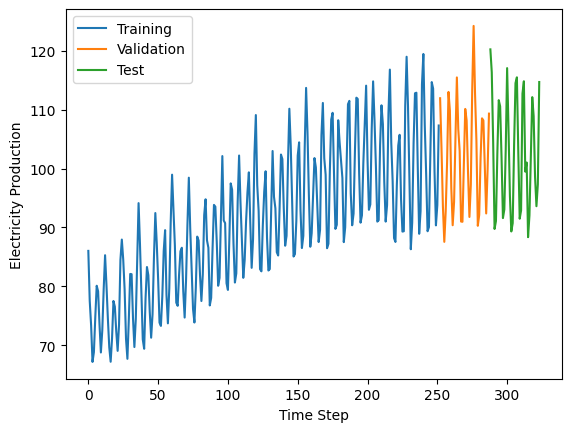

In [ ]:
### YOUR CODE HERE ###

In [ ]:
def plot_train_val_test(train_data, val_data, test_data):
  plt.figure(figsize=(12, 6))
  plt.plot(train_data, label='Training Data')
  plt.plot(val_data, label='Validation Data')
  plt.plot(test_data, label='Test Data')
  plt.xlabel('Time Step')
  plt.ylabel('Value')
  plt.title('Training, Validation, and Test Data')
  plt.legend()

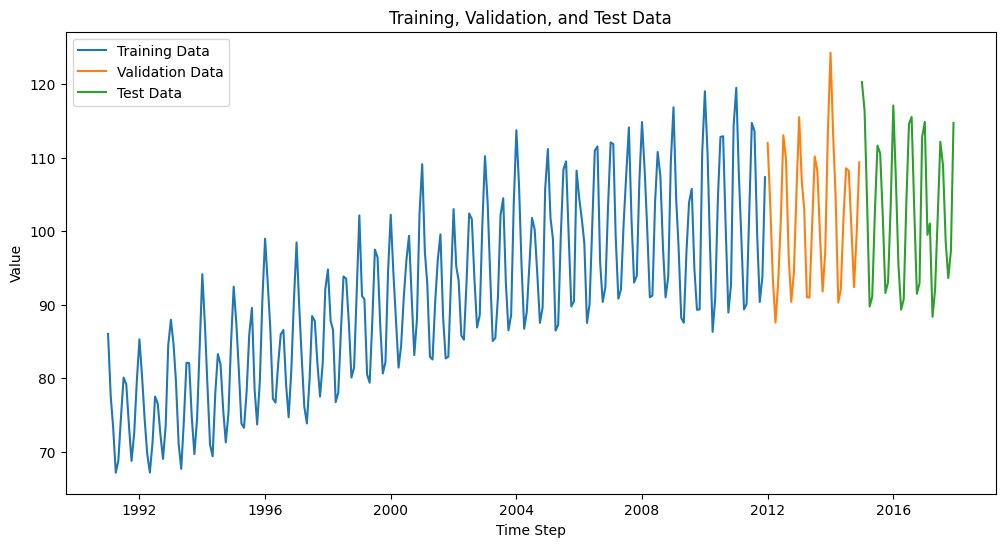

In [ ]:
plot_train_val_test(train_data_series, val_data_series, test_data_series)
plt.show()

### 2.2.3 Implementing a Custom Min-Max Scaler

When using LSTM, it is a good practice to rescale the data to a smaller range. A common approach is to scale data to the range of 0-to-1. You will implement your own scaler using the `MinMaxScaler01` class, which normalizes data to the 0-to-1 range.

Your task is to implement the following three functions in the `MinMaxScaler01` class:

* `fit`
    * Compute and save the minimum and maximum values of the input `data` in `self.min` and `self.max`, respectively.

* `transform`
    * Normalize the input `data` to the range 0-to-1 using the `self.min` and `self.max` values obtained from the `fit` method.

* `inverse_transform`
    * Convert the normalized data back to its original scale using the stored `self.min` and `self.max`.

**Hint:** To normalize the data, use the formula:

$$x_\text{normalized} = \frac{x - min}{max - min}$$







In [ ]:
### YOUR CODE HERE ###

In [ ]:
class MinMaxScaler01:
    def __init__(self):
        self.min = None
        self.max = None

    def fit(self, data):
        self.min = min(data)
        self.max = max(data)

    def transform(self, data):
      if self.min is None or self.max is None:
        pass
      else:
        transform_list = [(x - self.min) / (self.max - self.min) for x in data]
      return transform_list

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

    def inverse_transform(self, normalized_data):
        if self.min is None or self.max is None:
          pass
        else:
          inv_transform_list = [x * (self.max - self.min) + self.min for x in normalized_data]

        return inv_transform_list

We fit the scaler using the minimum and maximum values of the training set and then apply this scaler to transform all datasets to the new scale. Although the data has been normalized, the plot below shows that it still retains its original pattern, just rescaled to fit within the new range.

In [ ]:
scaler = MinMaxScaler01()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)
test_data = scaler.transform(test_data)

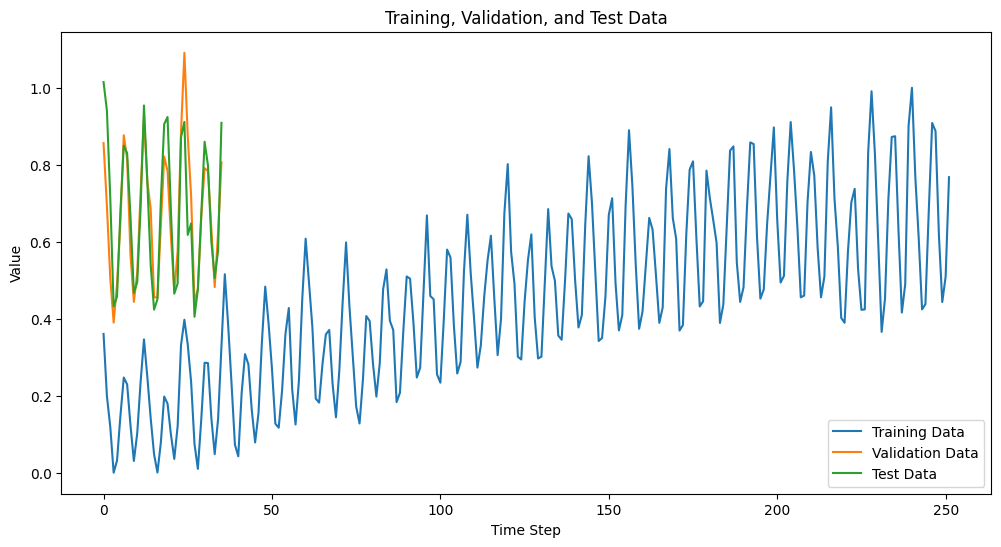

In [ ]:
plot_train_val_test(train_data, val_data, test_data)
plt.show()

### 2.2.4 Creating Input-Output Sequences for LSTM

To prepare our data for use in an LSTM model, we need to break the time series into smaller subsequences. This process allows the model to learn patterns from past data to predict future values. Let's walk through an example:

Suppose we have the following time series:

`[20.25, 19.14, 18.99, 19.05, 19.50, 20.97, 21.54, 20.88]`

If we want to use the previous 5 time steps to predict the next time step, we would slice the series into overlapping subsequences of 6 values each (5 for input, 1 for output):

Input: `[20.25, 19.14, 18.99, 19.05, 19.50]` -> Output: `20.97` \\
Input: `[19.14, 18.99, 19.05, 19.50, 20.97]` -> Output: `21.54` \\
Input: `[18.99, 19.05, 19.50, 20.97, 21.54]` -> Output: `20.88`

In each subsequence, the first 5 values are used as input (`X`), and the 6<sup>th</sup> value is the target output (`y`) that the model will learn to predict.

Your task is to implement the `create_dataset` function. This function takes the full `data` series and generates multiple input-output pairs based on a specified `lookback` period. The `lookback` parameter defines how many previous time steps to include in each input sequence. For instance, in the example above, `lookback` would be equal to 5. The function returns `X` and `y`, as explained below.

* `X`: A 2D NumPy array where each row contains a subsequence of length `lookback` from the original data. These will serve as the input sequences for the LSTM model.

* `y`: A 1D NumPy array where each element corresponds to the target value that the LSTM will predict, taken from the time step immediately following each input sequence in `X`.

**Example:**

Using the time series example above and setting `lookback` to 5, the resulting `X` and `y` arrays would look like this:

```python
X = [
    [20.25, 19.14, 18.99, 19.05, 19.50],
    [19.14, 18.99, 19.05, 19.50, 20.97],
    [18.99, 19.05, 19.50, 20.97, 21.54]
]

y = [
    20.97,
    21.54,
    20.88
]


In [ ]:
def create_dataset(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

We will first train the LSTM model with `lookback` = 1, which means the model will use only the most recent single time step to predict the next time step.

In [ ]:
lookback = 1
X_train_1, y_train_1 = create_dataset(train_data, lookback)
X_val_1, y_val_1 = create_dataset(val_data, lookback)
X_test_1, y_test_1 = create_dataset(test_data, lookback)

Before proceeding, it's important to verify the shapes of the `X` and `y` arrays to ensure they are correct. Otherwise, you might encounter errors when training the model. Run the following code block to check their shapes. If this code produces an error, you may need to revisit and correct your answers in tasks 2.2.1 or 2.2.4.

In [ ]:
assert X_train_1.shape == (251, 1), 'Incorrect shape for X_train_1'
assert y_train_1.shape == (251,), 'Incorrect shape for y_train_1'
assert X_val_1.shape == (35, 1), 'Incorrect shape for X_val_1'
assert y_val_1.shape == (35,), 'Incorrect shape for y_val_1'
assert X_test_1.shape == (35, 1), 'Incorrect shape for X_test_1'
assert y_test_1.shape == (35,), 'Incorrect shape for y_test_1'

### 2.2.5 Training and Evaluating the LSTM Model

**Note:** Your task for this lab is complete. However, please continue by running the remaining code to see how the LSTM model is trained and evaluated on the data you prepared.

In the code block below, we define two functions for working with the LSTM model:

* `lstm_train`: This function builds and trains an LSTM model using the provided input `X` and target output `y`.

* `lstm_predict`: This function uses the trained LSTM model to make predictions based on the input `X`.



In [ ]:
def lstm_train(X, y, lookback):
    X = X.reshape((-1, lookback, 1))
    y = y.reshape((-1, 1))

    model = Sequential()
    model.add(Input(shape=(lookback, 1)))
    model.add(LSTM(8))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, y, epochs=50, batch_size=2, verbose=0)

    return model

def lstm_predict(model, X):
    X = X.reshape((-1, lookback, 1))
    pred = model.predict(X, verbose=0)

    return pred.reshape(-1)

Next, we train and evaluate the LSTM model by calling the functions we defined earlier. We transform the predictions back to the original scale and compare them with the actual values by plotting them. Additionally, we assess the model's performance quantitatively using the Root Mean Squared Error (RMSE).

For this evaluation, we use the validation set. The test set will be utilized in a later section to further evaluate the model's performance.

In [ ]:
def plot_actual_predicted(actual, predicted):
    plt.plot(actual, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.xlabel('Time Step')
    plt.ylabel('Electricity Production')
    plt.legend()

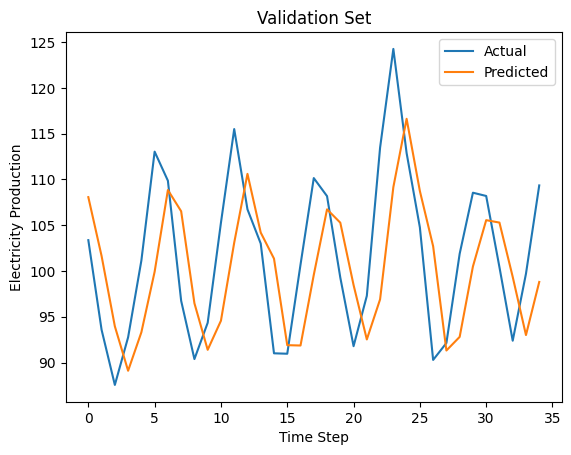

RMSE on validation set (for lookback = 1): 8.0625


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# The code might take a while to run, please be patient

lookback = 1
X_train_1, y_train_1 = create_dataset(train_data, lookback)
X_val_1, y_val_1 = create_dataset(val_data, lookback)
X_test_1, y_test_1 = create_dataset(test_data, lookback)

model_1 = lstm_train(X_train_1, y_train_1, lookback)

y_val_pred_1 = lstm_predict(model_1, X_val_1)

plot_actual_predicted(scaler.inverse_transform(y_val_1), scaler.inverse_transform(y_val_pred_1))
plt.title("Validation Set")
plt.show()

print('RMSE on validation set (for lookback = 1): {:.4f}'.format(mean_squared_error(scaler.inverse_transform(y_val_1), scaler.inverse_transform(y_val_pred_1), squared=False)))

You have seen how the LSTM model performed with a `lookback` value of 1. Next, we will explore the effect of increasing the `lookback` value to 5. This means we will use the previous 5 time steps to predict the next time step, rather than just the most recent time step.

This adjustment is an example of hyperparameter tuning, a common practice in machine learning to improve model performance. While there are many other hyperparameters in the `lstm_train` function, we will focus solely on tuning the `lookback` value for now, as we have not yet covered other hyperparameters in detail.

This is why we use the validation set for evaluation instead of the test set at this stage. During hyperparameter tuning, we compare the model’s performance on the validation set to ensure that our hyperparameter choices aren't biased by the test set.

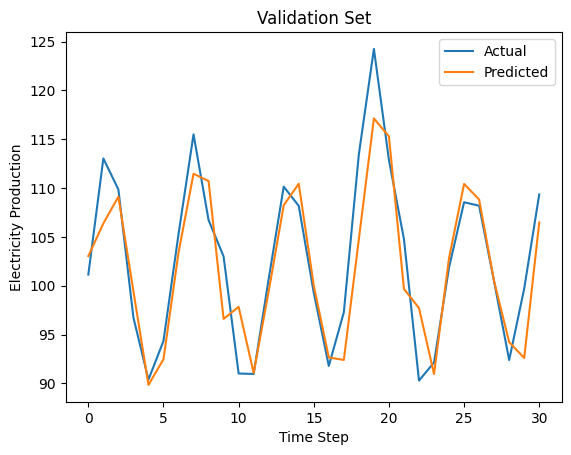

RMSE on validation set (for lookback = 5): 4.0146


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# The code might take a while to run, please be patient

lookback = 5
X_train_5, y_train_5 = create_dataset(train_data, lookback)
X_val_5, y_val_5 = create_dataset(val_data, lookback)
X_test_5, y_test_5 = create_dataset(test_data, lookback)

model_5 = lstm_train(X_train_5, y_train_5, lookback)
y_val_pred_5 = lstm_predict(model_5, X_val_5)

plot_actual_predicted(scaler.inverse_transform(y_val_5), scaler.inverse_transform(y_val_pred_5))
plt.title("Validation Set")
plt.show()

print('RMSE on validation set (for lookback = 5): {:.4f}'.format(mean_squared_error(scaler.inverse_transform(y_val_5), scaler.inverse_transform(y_val_pred_5), squared=False)))

By observing the results, you would have noticed that the LSTM model performs better on the validation set when `lookback` is set to 5 compared to when it is set to 1. Therefore, we will choose to use `lookback` = 5 for our final model. We can now proceed to evaluate the selected model using the test set.

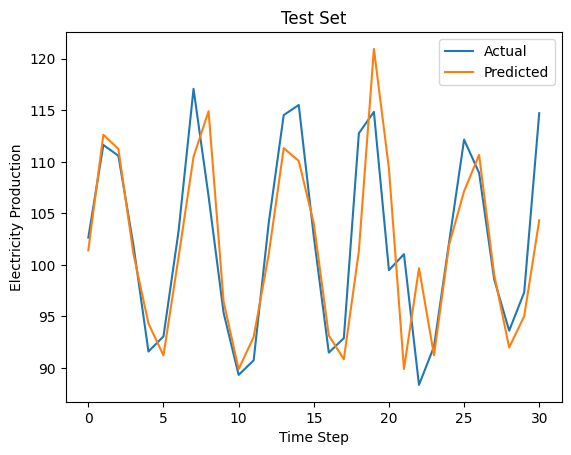

RMSE on test set (for lookback = 5): 5.2644


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
y_test_pred_5 = lstm_predict(model_5, X_test_5)

plot_actual_predicted(scaler.inverse_transform(y_test_5), scaler.inverse_transform(y_test_pred_5))
plt.title("Test Set")
plt.show()

print('RMSE on test set (for lookback = 5): {:.4f}'.format(mean_squared_error(scaler.inverse_transform(y_test_5), scaler.inverse_transform(y_test_pred_5), squared=False)))

Finally, to better understand the result, we'll plot the actual and predicted test data against the corresponding dates, as shown below.

**Note:** You might notice and wonder why the first 5 months are missing from the prediction. It was because they were used as part of the `lookback` period. Specifically, the first 5 time steps were needed to create the input sequences for the 6<sup>th</sup> time step, so the model didn't produce predictions for these early time steps.


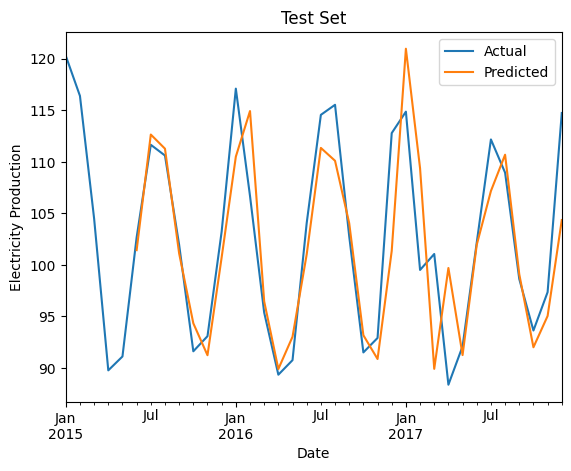

In [ ]:
prediction_series = pd.Series(scaler.inverse_transform(y_test_pred_5), index=test_data_series.index[lookback:])

test_data_series.plot(label='Actual')
prediction_series.plot(label='Predicted')
plt.ylabel('Electricity Production')
plt.title("Test Set")
plt.legend()
plt.show()

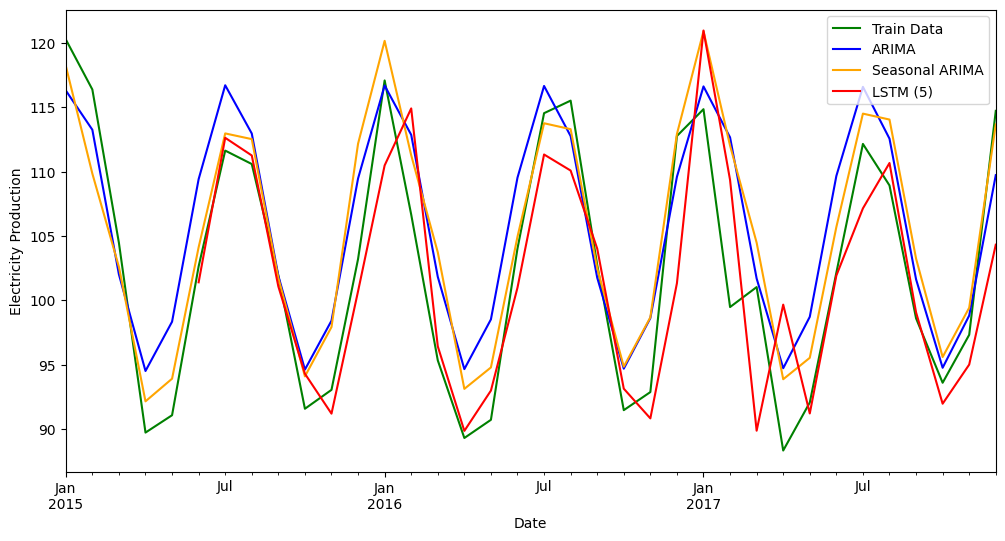

In [ ]:
plt.figure(figsize=(12, 6))
test_data_series.plot(label='Train Data', color='green')
prediction.plot(label='ARIMA', color='blue')
prediction_seasonal.plot(label='Seasonal ARIMA', color='orange')
prediction_series.plot(label='LSTM (5)', color='red')
plt.xlabel("Date")
plt.ylabel("Electricity Production")
plt.legend()

**Reference:** Some portions of code are taken from [Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)




---


# 3. Advanced Predictive AI

In this session, we will evaluate a simple object detection model by downloading the pre-trained model and the open-source image along with its ground truth annotation. The code for visualization is already provided.

Your task is to write the code for the evaluation part in the functions named calculate_iou and eval (Part 3.7).

## 3.1 Environment Installation

In [ ]:
!pip install tensorflow
!pip install tensorflow-hub
!pip install matplotlib
!pip install pillow

## 3.2 Import Libraries

In [ ]:
#### Just run, no revision needed. ####

# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

# Print Tensorflow version
print(tf.__version__)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

2.17.0
The following GPU devices are available: 


## 3.3 Utility Functions

These are some utility functions that are already prepared. No need to revise, but please read and understand.

In [ ]:
#### Just run, no revision needed. ####

def display_image(image):
  fig = plt.figure(figsize=(10, 10))
  plt.grid(False)
  plt.imshow(image)


def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.LANCZOS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename


def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  """Adds a bounding box to an image."""
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  # If the total height of the display strings added to the top of the bounding
  # box exceeds the top of the image, stack the strings below the bounding box
  # instead of above.
  display_str_heights = [font.getbbox(ds)[3] for ds in display_str_list]
  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    bbox = font.getbbox(display_str)
    text_width, text_height = bbox[2], bbox[3]
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      display_str = "{}: {}%".format(class_names[i].decode('utf-8'),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image


def convert_box(box, width, height):
  xmin, ymin, w, h = box
  xmax = xmin + w
  ymax = ymin + h

  #normalize
  ymin = ymin / height
  xmin = xmin / width
  ymax = ymax / height
  xmax = xmax / width
  return ymin, xmin, ymax, xmax


def draw_boxes_gt(image, box):
  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  #format
  display_str = "gt_cat"
  color = "#556b2f"
  image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
  width, height = image_pil.size
  ymin, xmin, ymax, xmax = convert_box(box, width, height)

  draw_bounding_box_on_image(
      image_pil,
      ymin,
      xmin,
      ymax,
      xmax,
      color,
      font,
      display_str_list=[display_str])
  np.copyto(image, np.array(image_pil))
  print(xmin, ymin)
  return image


def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

def run_detector(detector, path, display=False):
  img = load_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  if display:
    display_image(image_with_boxes)
  return result

## 3.4 Download Sample Image

Image downloaded to /tmp/tmp7y7yl4my.jpg.


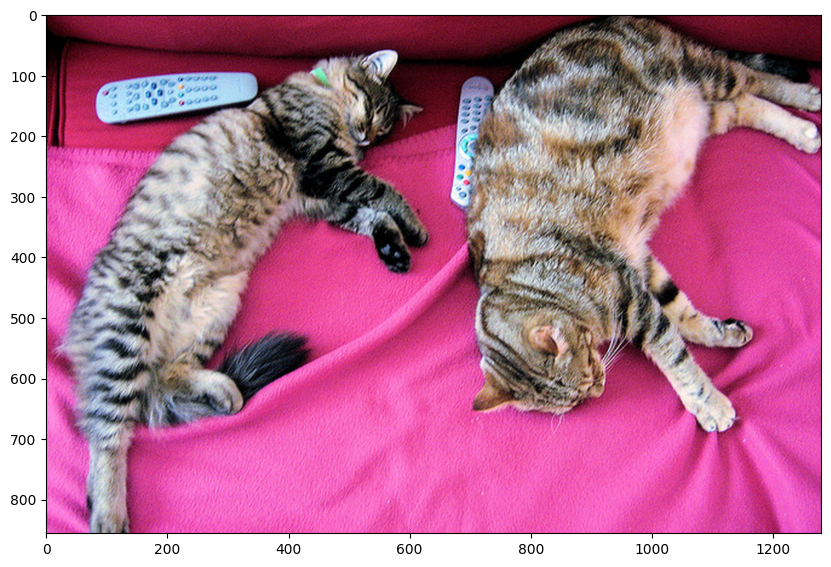

In [ ]:
#### Just run, no revision needed. ####
image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"

downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

## 3.5 Ground Truth Visualization

ground truths can be downloaded from
 http://images.cocodataset.org/annotations/annotations_trainval2017.zip

Image downloaded to /tmp/tmppsqnat5m.jpg.
0.02734375 0.11329166666666667
0.54296875 0.05339583333333333


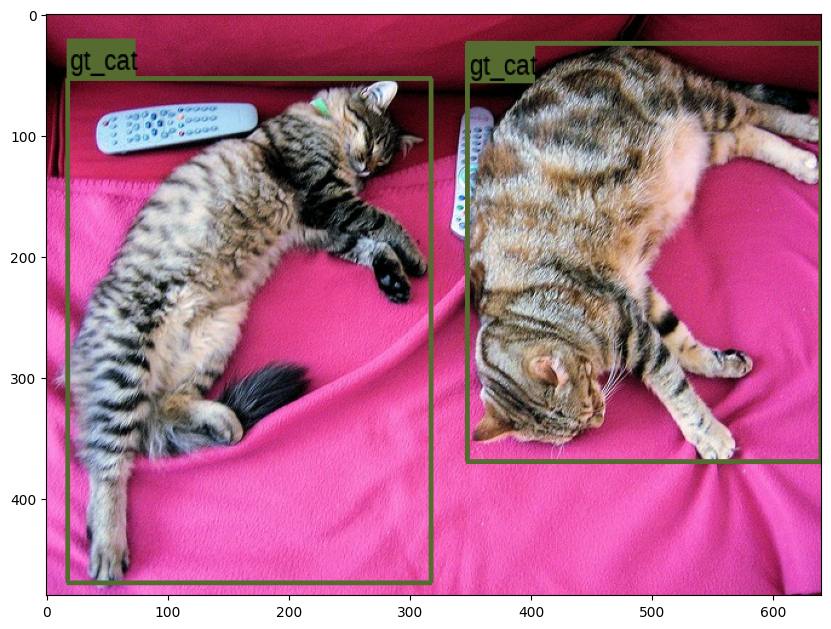

In [ ]:
#### Just run, no revision needed. ####

## ground truths are prepared here
gt_box_cat1 = [17.5, 54.38, 301.25, 415.0]
gt_box_cat2 = [347.5, 25.63, 292.5, 343.75]
image_width = 640
image_height = 480

downloaded_image_path2 = download_and_resize_image(image_url, image_width, image_height, display=False)
image = load_img(downloaded_image_path2)
output_image = draw_boxes_gt(image.numpy(), gt_box_cat1)
output_image = draw_boxes_gt(output_image, gt_box_cat2)
display_image(output_image)

## 3.6 Prediction

In [ ]:
#### Just run, no revision needed. ####
### Download the pre-trained model ###
module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"

detector = hub.load(module_handle).signatures['default']

Found 100 objects.
Inference time:  13.246774673461914


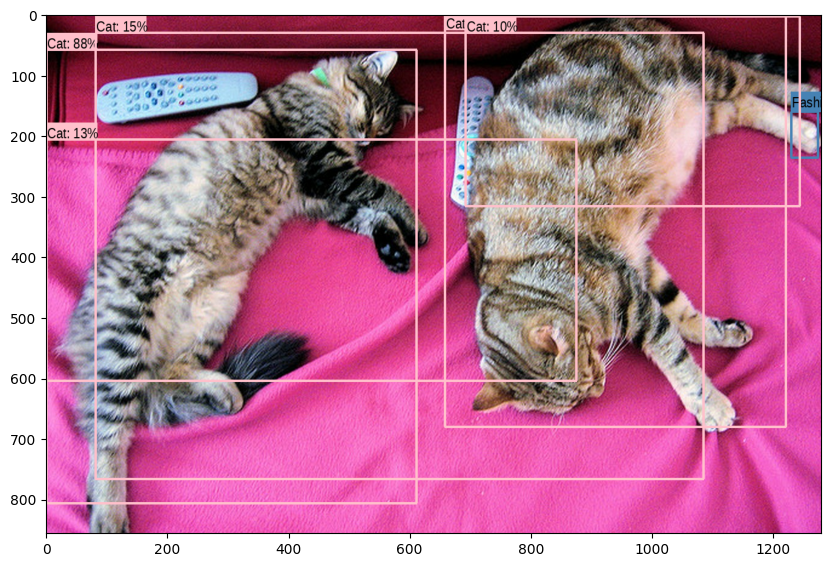

In [ ]:
#### Just run, no revision needed. ####
### Do the prediction ###
predictions = run_detector(detector, downloaded_image_path, display=True)

## 3.7 Evaluation

In [ ]:
# Write the script to calculate IOU
def calculate_iou(box_a, box_b):
  #### YOUR CODE IS HERE ####
  ymin_a, xmin_a, ymax_a, xmax_a = box_a
  ymin_b, xmin_b, ymax_b, xmax_b = box_b

  # Calculate intersection coordinates
  inter_xmin = max(xmin_a, xmin_b)
  inter_ymin = max(ymin_a, ymin_b)
  inter_xmax = min(xmax_a, xmax_b)
  inter_ymax = min(ymax_a, ymax_b)

  # Check if there is an overlap
  inter_width = max(0, inter_xmax - inter_xmin)
  inter_height = max(0, inter_ymax - inter_ymin)

  # Intersection area
  inter_area = inter_width * inter_height

  # Area of both the boxes
  box_a_area = (xmax_a - xmin_a) * (ymax_a - ymin_a)
  box_b_area = (xmax_b - xmin_b) * (ymax_b - ymin_b)

  # Union area
  union_area = box_a_area + box_b_area - inter_area

  # Return IOU
  if union_area == 0:
      return 0
  iou = inter_area / union_area
  ###########################
  return iou


def eval(gt_box_list, predictions, conf_threshold, iou_threshold):
  precision = 0
  recall = 0
  detection_boxes = predictions["detection_boxes"]
  detection_class_entities = predictions["detection_class_entities"]
  detection_scores = predictions["detection_scores"]
  # Ensure all three lists are of the same length
  assert len(detection_boxes) == len(detection_class_entities) == len(detection_scores)

  true_positives = 0
  false_positives = 0
  false_negatives = 0
  matched_gt_boxes = []
  # Iterate over the elements
  for pred_box, pred_class, pred_score in zip(detection_boxes, detection_class_entities, detection_scores):
    # print(f"Detection Score: {pred_score}")
    # print(f"Class: {pred_class.decode('utf-8')}")
    # print(f"Detection Box: {pred_box}")
    # print("-----------------------------")
    if pred_score < conf_threshold:
      continue

    best_iou = 0
    best_gt_box = None

    # Compare with each ground truth box
    for gt_box in gt_box_list:
        iou = calculate_iou(pred_box, gt_box)

        if iou > best_iou:
            best_iou = iou
            best_gt_box = gt_box

    # Check if the prediction is a true positive
    if best_iou >= iou_threshold and best_gt_box not in matched_gt_boxes:
        true_positives += 1
        matched_gt_boxes.append(best_gt_box)
    else:
        false_positives += 1

  # Calculate false negatives
  false_negatives = len(gt_box_list) - len(matched_gt_boxes)

  # Calculate precision and recall
  if true_positives + false_positives > 0:
      precision = true_positives / (true_positives + false_positives)
  if true_positives + false_negatives > 0:
      recall = true_positives / (true_positives + false_negatives)

  return precision, recall


In [ ]:
#### Just run, no revision needed. ####
### Main Function to Predict and Evaluate the Results with Ground Truth ###

## ground truths are prepared here
gt_box_cat1 = [17.5, 54.38, 301.25, 415.0]
gt_box_cat2 = [347.5, 25.63, 292.5, 343.75]

## make it the same format
ymin, xmin, ymax, xmax = convert_box(gt_box_cat1, width=image_width, height=image_height)
gt_box_cat1 = [ymin, xmin, ymax, xmax]
ymin, xmin, ymax, xmax = convert_box(gt_box_cat2, width=image_width, height=image_height)
gt_box_cat2 = [ymin, xmin, ymax, xmax]
gt_box_cat_list = [gt_box_cat1, gt_box_cat2]

## do the prediction
predictions = run_detector(detector, downloaded_image_path, display=False)


## eval
conf_threshold = 0.5
iou_threshold = 0.5
precision, recall = eval(gt_box_list=gt_box_cat_list, predictions=predictions, conf_threshold=conf_threshold, iou_threshold=iou_threshold)
print(f"Confidence Threshold: {conf_threshold:.2f}, IoU Threshold: {iou_threshold:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")


conf_threshold = 0.5
iou_threshold = 0.8
precision, recall = eval(gt_box_list=gt_box_cat_list, predictions=predictions, conf_threshold=conf_threshold, iou_threshold=iou_threshold)
print(f"Confidence Threshold: {conf_threshold:.2f}, IoU Threshold: {iou_threshold:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")


conf_threshold = 0.8
iou_threshold = 0.5
precision, recall = eval(gt_box_list=gt_box_cat_list, predictions=predictions, conf_threshold=conf_threshold, iou_threshold=iou_threshold)
print(f"Confidence Threshold: {conf_threshold:.2f}, IoU Threshold: {iou_threshold:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")


conf_threshold = 0.8
iou_threshold = 0.8
precision, recall = eval(gt_box_list=gt_box_cat_list, predictions=predictions, conf_threshold=conf_threshold, iou_threshold=iou_threshold)
print(f"Confidence Threshold: {conf_threshold:.2f}, IoU Threshold: {iou_threshold:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Found 100 objects.
Inference time:  0.6206910610198975
Confidence Threshold: 0.50, IoU Threshold: 0.50, Precision: 1.00, Recall: 1.00
Confidence Threshold: 0.50, IoU Threshold: 0.80, Precision: 0.50, Recall: 0.50
Confidence Threshold: 0.80, IoU Threshold: 0.50, Precision: 1.00, Recall: 0.50
Confidence Threshold: 0.80, IoU Threshold: 0.80, Precision: 1.00, Recall: 0.50
